In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

import umap

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(['#7dba91', '#40908e', '#1c6488', '#254b7f',
                 '#f6b48f', '#e13342', '#701f57', '#35193e'])
sns.set_context('poster')
pal=sns.color_palette().as_hex()

In [2]:
ts=pd.read_csv('20220208_Jez_PEX10_reanalysis_2023-Feb-08-13-12-57_summary_by_well.csv')
ts['genotype']=['WT' if x < 13 else 'MUT' for x in ts.Column]
ts=ts.rename(columns={'T':'time'})
ts['T_hr']=ts.time.map({1:1, 3:5,2:3, 4:8})
ts['GThr']=ts.genotype+'_'+ts.T_hr.astype(str)+'hr'
ts.head()

Row  Column WELL LABEL  Z  time  Pastoris Nuclei Count wv1  \
0   A       1      A - 1  1     1                        949   
1   A       1      A - 1  1     2                        955   
2   A       1      A - 1  1     3                        971   
3   A       1      A - 1  1     4                       1024   
4   A       2      A - 2  1     1                        673   

   Pastoris Area wv1  Pastoris Intensity wv1  Pastoris Total Intensity wv1  \
0          22.037031             4104.694220                 101733.536954   
1          20.865749             4332.408249                 100827.797909   
2          20.773941             4155.312845                  96139.167361   
3          19.518242             4051.780025                  87843.399854   
4          22.256741             3763.542616                  95293.203167   

   Pastoris Intensity CV wv1  ...  Organelles Intensity/Global Bckg wv2  \
0                   0.319348  ...                              4.671740   
1                   0.463929  ...                             12.428416   
2                   0.519371  ...                             17.178127   
3                   0.535933  ...                             17.918182   
4                   0.337377  ...                              4.282305   

   Organelles Intensity Spreading wv2  Organelles Intensity-Bckg wv2  \
0                            0.866222                     396.544878   
1                            0.783775                    1277.552699   
2                            0.776159                    1799.951116   
3                            0.800643                    1887.824539   
4                            0.854520                     342.975492   

   Organelles Total Intensity-Bckg wv2  Organelles Pearson correlation wv2  \
0                          4638.019873                            0.511380   
1                          4947.512433                            0.744519   
2                          6278.551045                            0.812238   
3                          6897.617833                            0.841062   
4                          4689.635623                            0.536874   

   Organelles Pearson correlation wv1  Plate ID  genotype  T_hr    GThr  
0                            0.511380       NaN        WT     1  WT_1hr  
1                            0.744519       NaN        WT     3  WT_3hr  
2                            0.812238       NaN        WT     5  WT_5hr  
3                            0.841062       NaN        WT     8  WT_8hr  
4                            0.536874       NaN        WT     1  WT_1hr  

[5 rows x 55 columns]

In [3]:
wv2cols=[x for x in ts.columns if 'wv2' in x]
wv2cols.append('T_hr')
len(wv2cols)

33

In [4]:
sns.set_context('notebook')
# sns.pairplot(ts.loc[ts.genotype=='WT', wv2cols], hue='T_hr', palette=pal[0:4])

In [5]:
sns.set_context('notebook')
# sns.pairplot(ts.loc[ts.genotype=='MUT', wv2cols], hue='T_hr', palette=pal[4:])

In [6]:
wv2cols=[x for x in ts.columns if 'wv2' in x]
wv2cols.append('genotype')

sns.set_context('notebook')
# sns.pairplot(ts[wv2cols], hue='genotype', palette=[pal[0], pal[4]])

In [7]:
wv2cols=[x for x in ts.columns if 'wv2' in x]
wv2cols.append('genotype')
wv2cols.append('T_hr')
sns.set_context('notebook')
# sns.pairplot(ts.loc[ts.T_hr==1, wv2cols].drop(columns='T_hr'), hue='genotype', palette=[pal[0], pal[4]])

In [8]:
wv2cols=[x for x in ts.columns if 'wv2' in x]
wv2cols.append('genotype')
wv2cols.append('T_hr')
sns.set_context('notebook')
# sns.pairplot(ts.loc[ts.T_hr==3, wv2cols].drop(columns='T_hr'), hue='genotype', palette=[pal[1], pal[5]])

In [9]:
wv2cols=[x for x in ts.columns if 'wv2' in x]
wv2cols.append('genotype')
wv2cols.append('T_hr')
sns.set_context('notebook')
# sns.pairplot(ts.loc[ts.T_hr==5, wv2cols].drop(columns='T_hr'), hue='genotype', palette=[pal[2], pal[6]])

In [10]:
wv2cols=[x for x in ts.columns if 'wv2' in x]
wv2cols.append('genotype')
wv2cols.append('T_hr')
sns.set_context('notebook')
# sns.pairplot(ts.loc[ts.T_hr==8, wv2cols].drop(columns='T_hr'), hue='genotype', palette=[pal[3], pal[7]])

In [11]:
wv2cols=['Pastoris Intensity SD wv2',
'Pastoris Light Flux wv2',
'Pastoris Intensity CV wv2',
'Pastoris Pearson correlation wv2',
    'Pastoris Intensity-Bckg wv2',
 'Pastoris Total Intensity-Bckg wv2',
 'Pastoris Intensity/Global Bckg wv2',
 'Pastoris Max Intensity wv2',
 'Pastoris Skewness wv2',
 'Pastoris Kurtosis wv2',
 'Pastoris Energy wv2',
 'Pastoris Entropy wv2',
 'Organelles Area wv2',
'Organelles Intensity CV wv2',
'Organelles Total Area wv2',
'Organelles Pearson correlation wv2',
 'Organelles Cells with Org wv2',
 'Organelles Org per Cell wv2',
 'Organelles Form Factor wv2',
 'Organelles Elongation wv2',
 'Organelles Compactness wv2',
 'Organelles Organelle/Cyto Intensity wv2',
 'Organelles Organelle/Bckg Intensity wv2',
 'Organelles Intensity/Global Bckg wv2',
 'Organelles Intensity Spreading wv2',
 'Organelles Intensity-Bckg wv2',
 'Organelles Total Intensity-Bckg wv2',]

In [12]:
# wv2cols=[x for x in ts.columns if 'wv2' in x]

In [318]:
wv2=ts[wv2cols].values
scaled_wv2=StandardScaler().fit_transform(wv2)

reducer=umap.UMAP()
scaledembedding=reducer.fit_transform(scaled_wv2)
scaledembedding.shape
ts['Scaled_UMAP_X']=scaledembedding[:,0]
ts['Scaled_UMAP_Y']=scaledembedding[:,1]

reducer=umap.UMAP()
embedding=reducer.fit_transform(wv2)
embedding.shape
ts['UMAP_X']=embedding[:,0]
ts['UMAP_Y']=embedding[:,1]

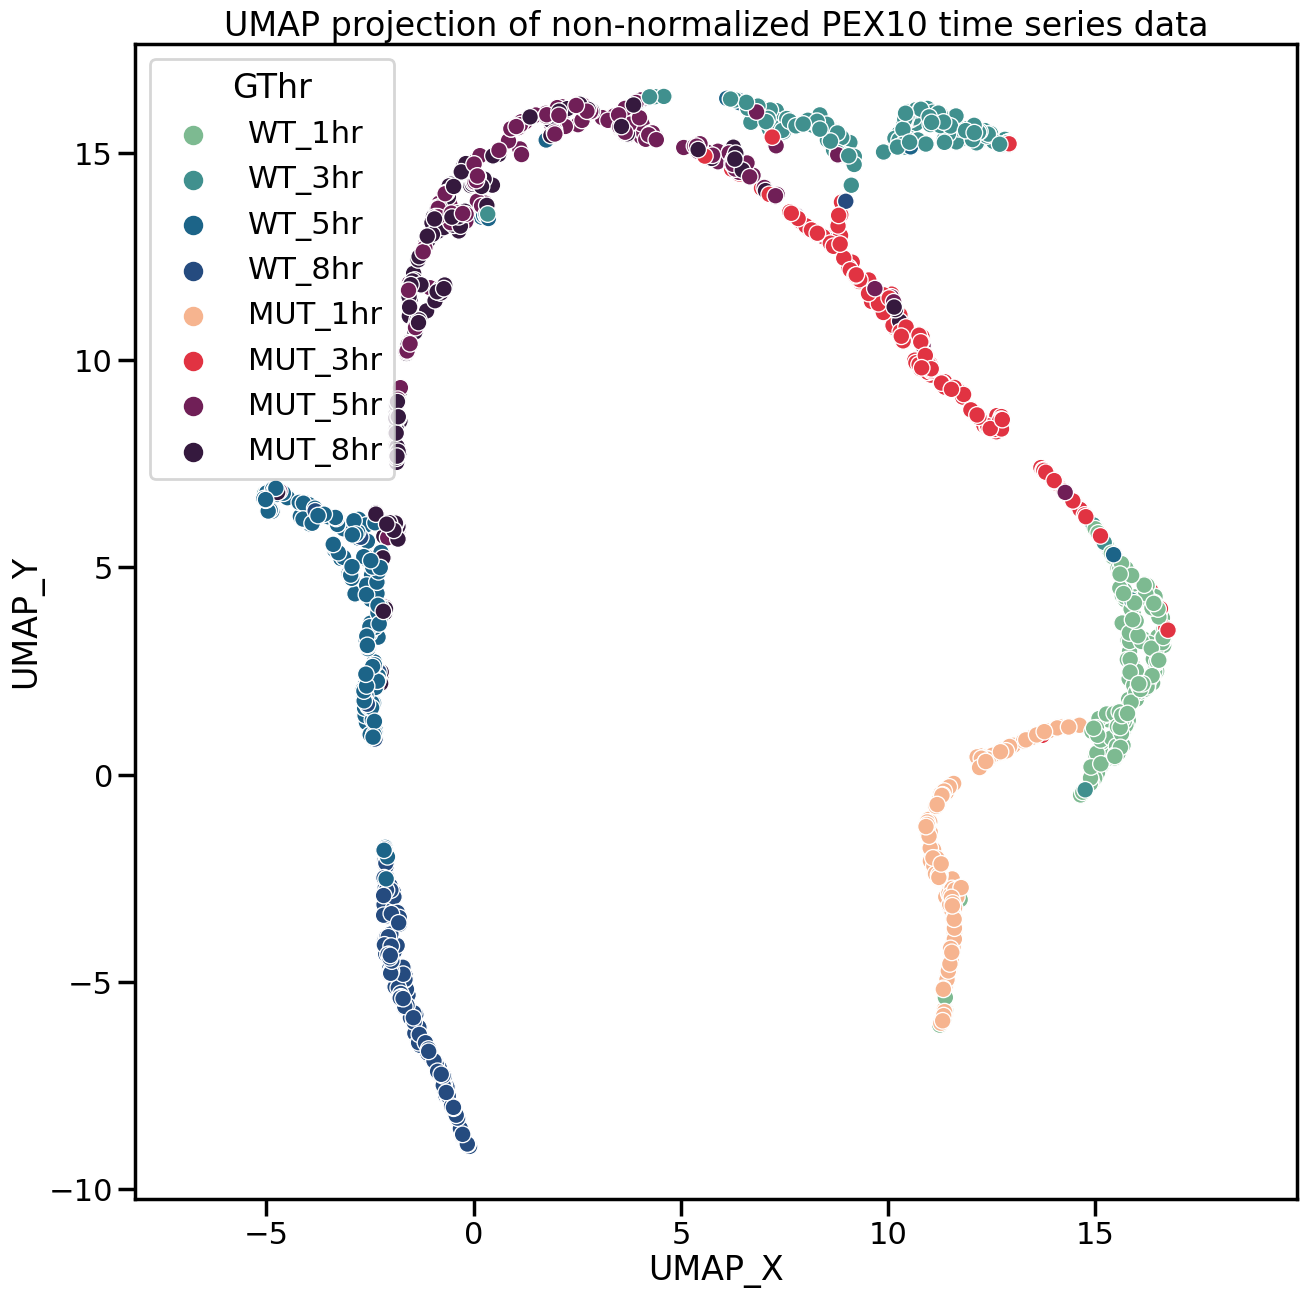

In [319]:
fig, ax = plt.subplots(1, figsize=(15,15))
sns.scatterplot(x=ts.UMAP_X, y=ts.UMAP_Y, hue=ts.GThr)
ax.set_title('UMAP projection of non-normalized PEX10 time series data')
plt.gca().set_aspect('equal', 'datalim')

In [321]:
len(wv2cols)

27

In [305]:
ts.GThr.unique()

array(['WT_1hr', 'WT_3hr', 'WT_5hr', 'WT_8hr', 'MUT_1hr', 'MUT_3hr',
       'MUT_5hr', 'MUT_8hr'], dtype=object)

/home/apaulson/miniconda3/envs/new-pandas/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


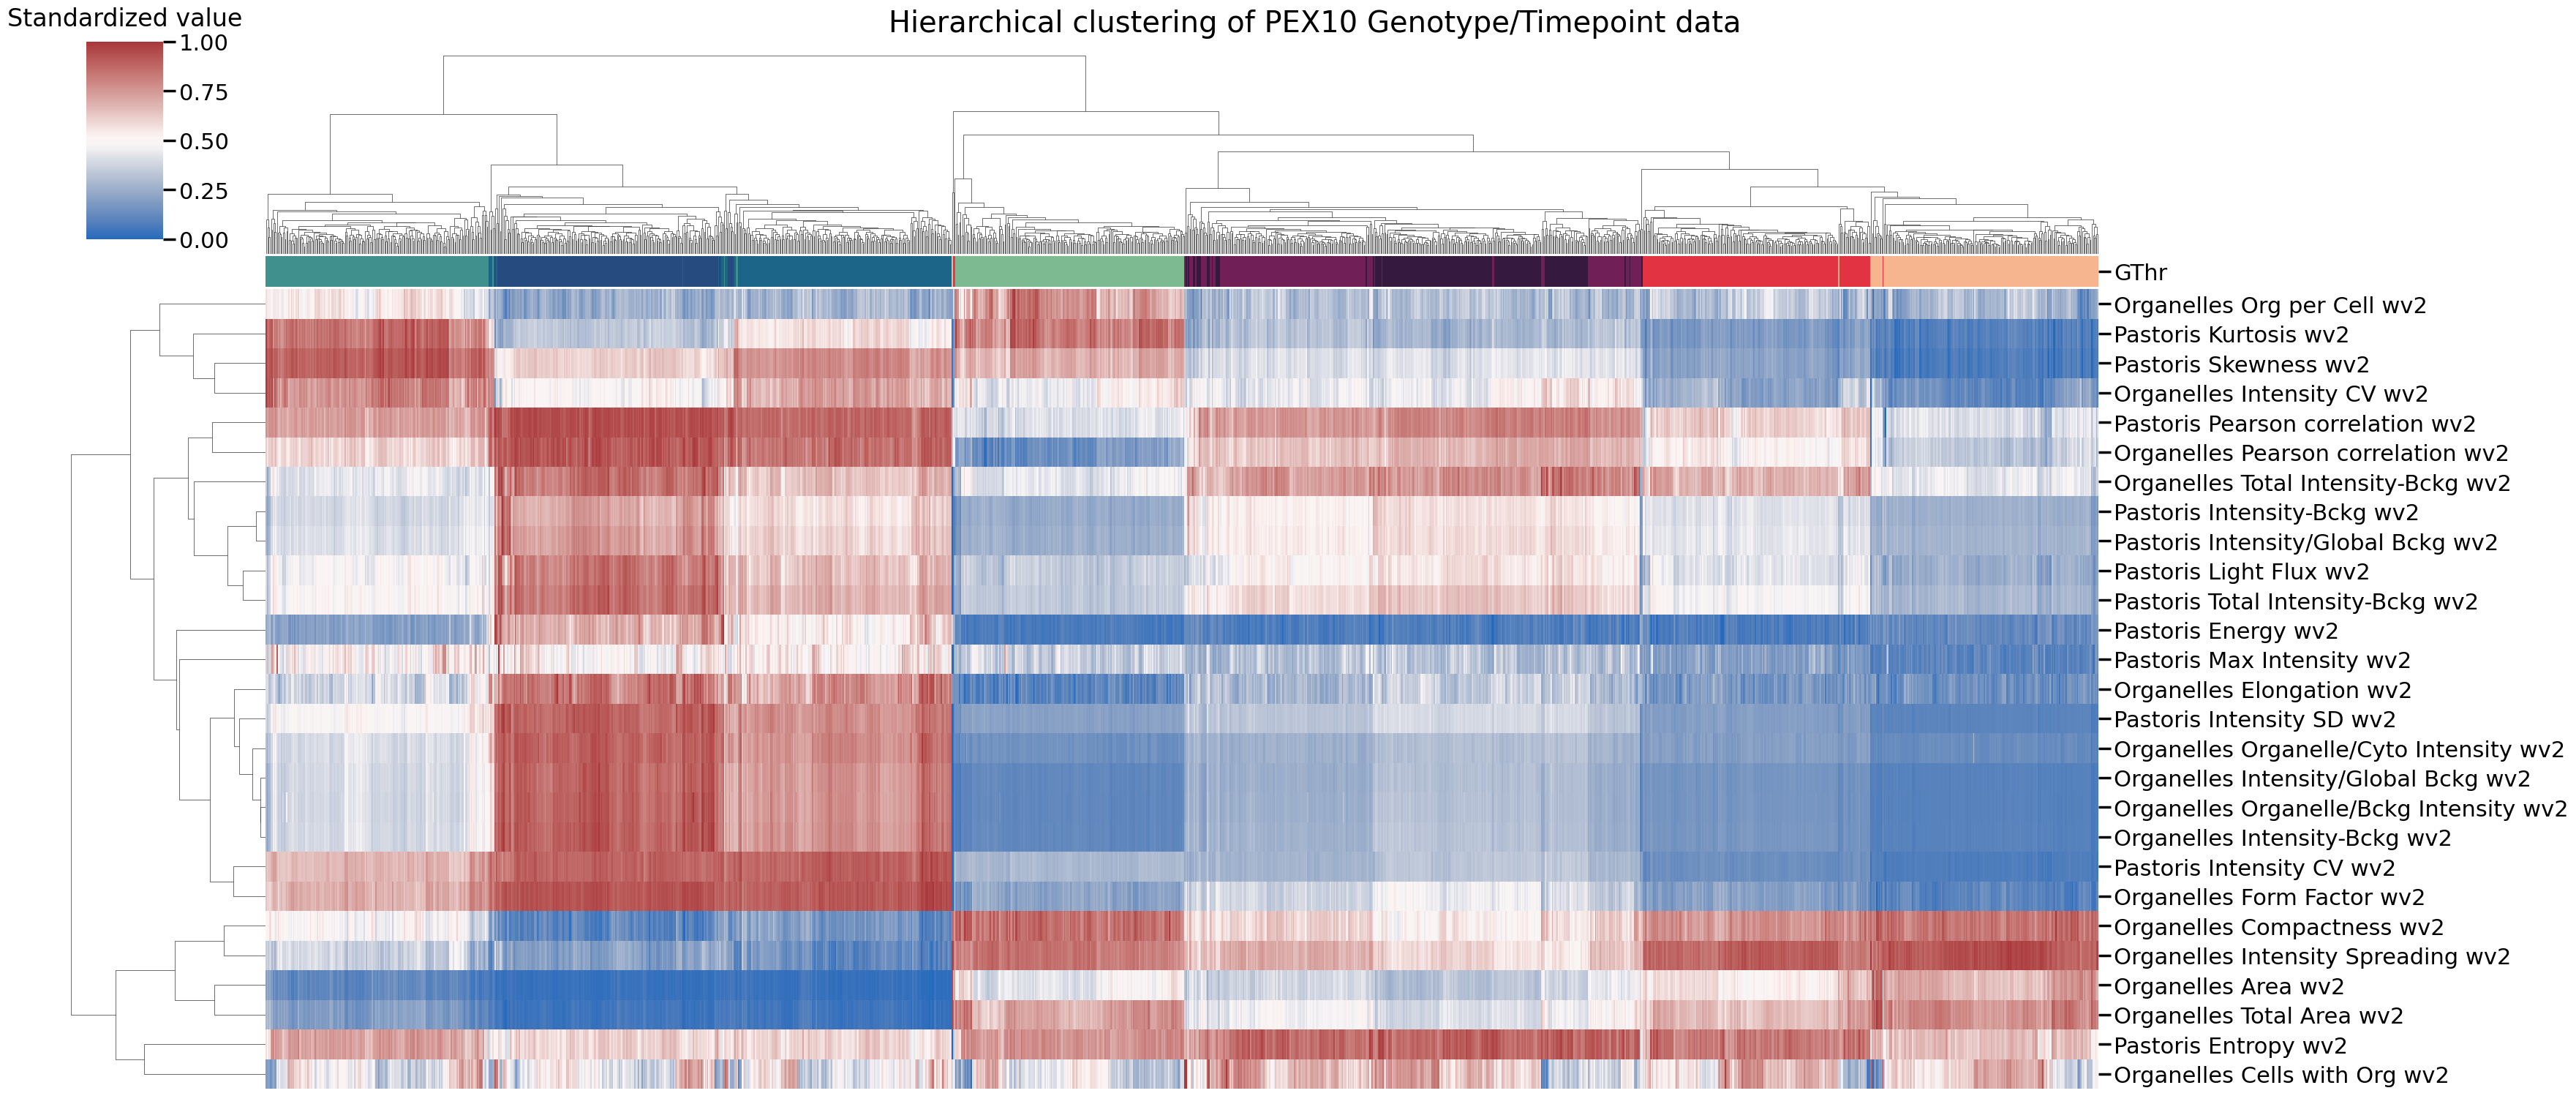

In [306]:
lut = dict(zip(ts.GThr.unique(), pal.as_hex()))
row_colors = ts.GThr.map(lut)
kwargs={'xticklabels':False,
       'yticklabels':True}
sns.clustermap(ts[wv2cols].T, 
               standard_scale=0, 
               col_colors=row_colors, 
               cmap="vlag",
               figsize=(35, 15),
               dendrogram_ratio=(0.1, 0.2),
               cbar_pos=(0.02, 0.8, 0.03, 0.18),
               **kwargs)
plt.title('Standardized value', y=1.05)
plt.suptitle('Hierarchical clustering of PEX10 Genotype/Timepoint data', y=1.01);

In [307]:
sns.set_context('poster')
# Compute the correlation matrix
scaled_wv2=StandardScaler().fit_transform(ts[wv2cols])
scaled_wv2=pd.DataFrame(scaled_wv2, columns=wv2cols, index=ts.index)

corr = scaled_wv2.T.corr()

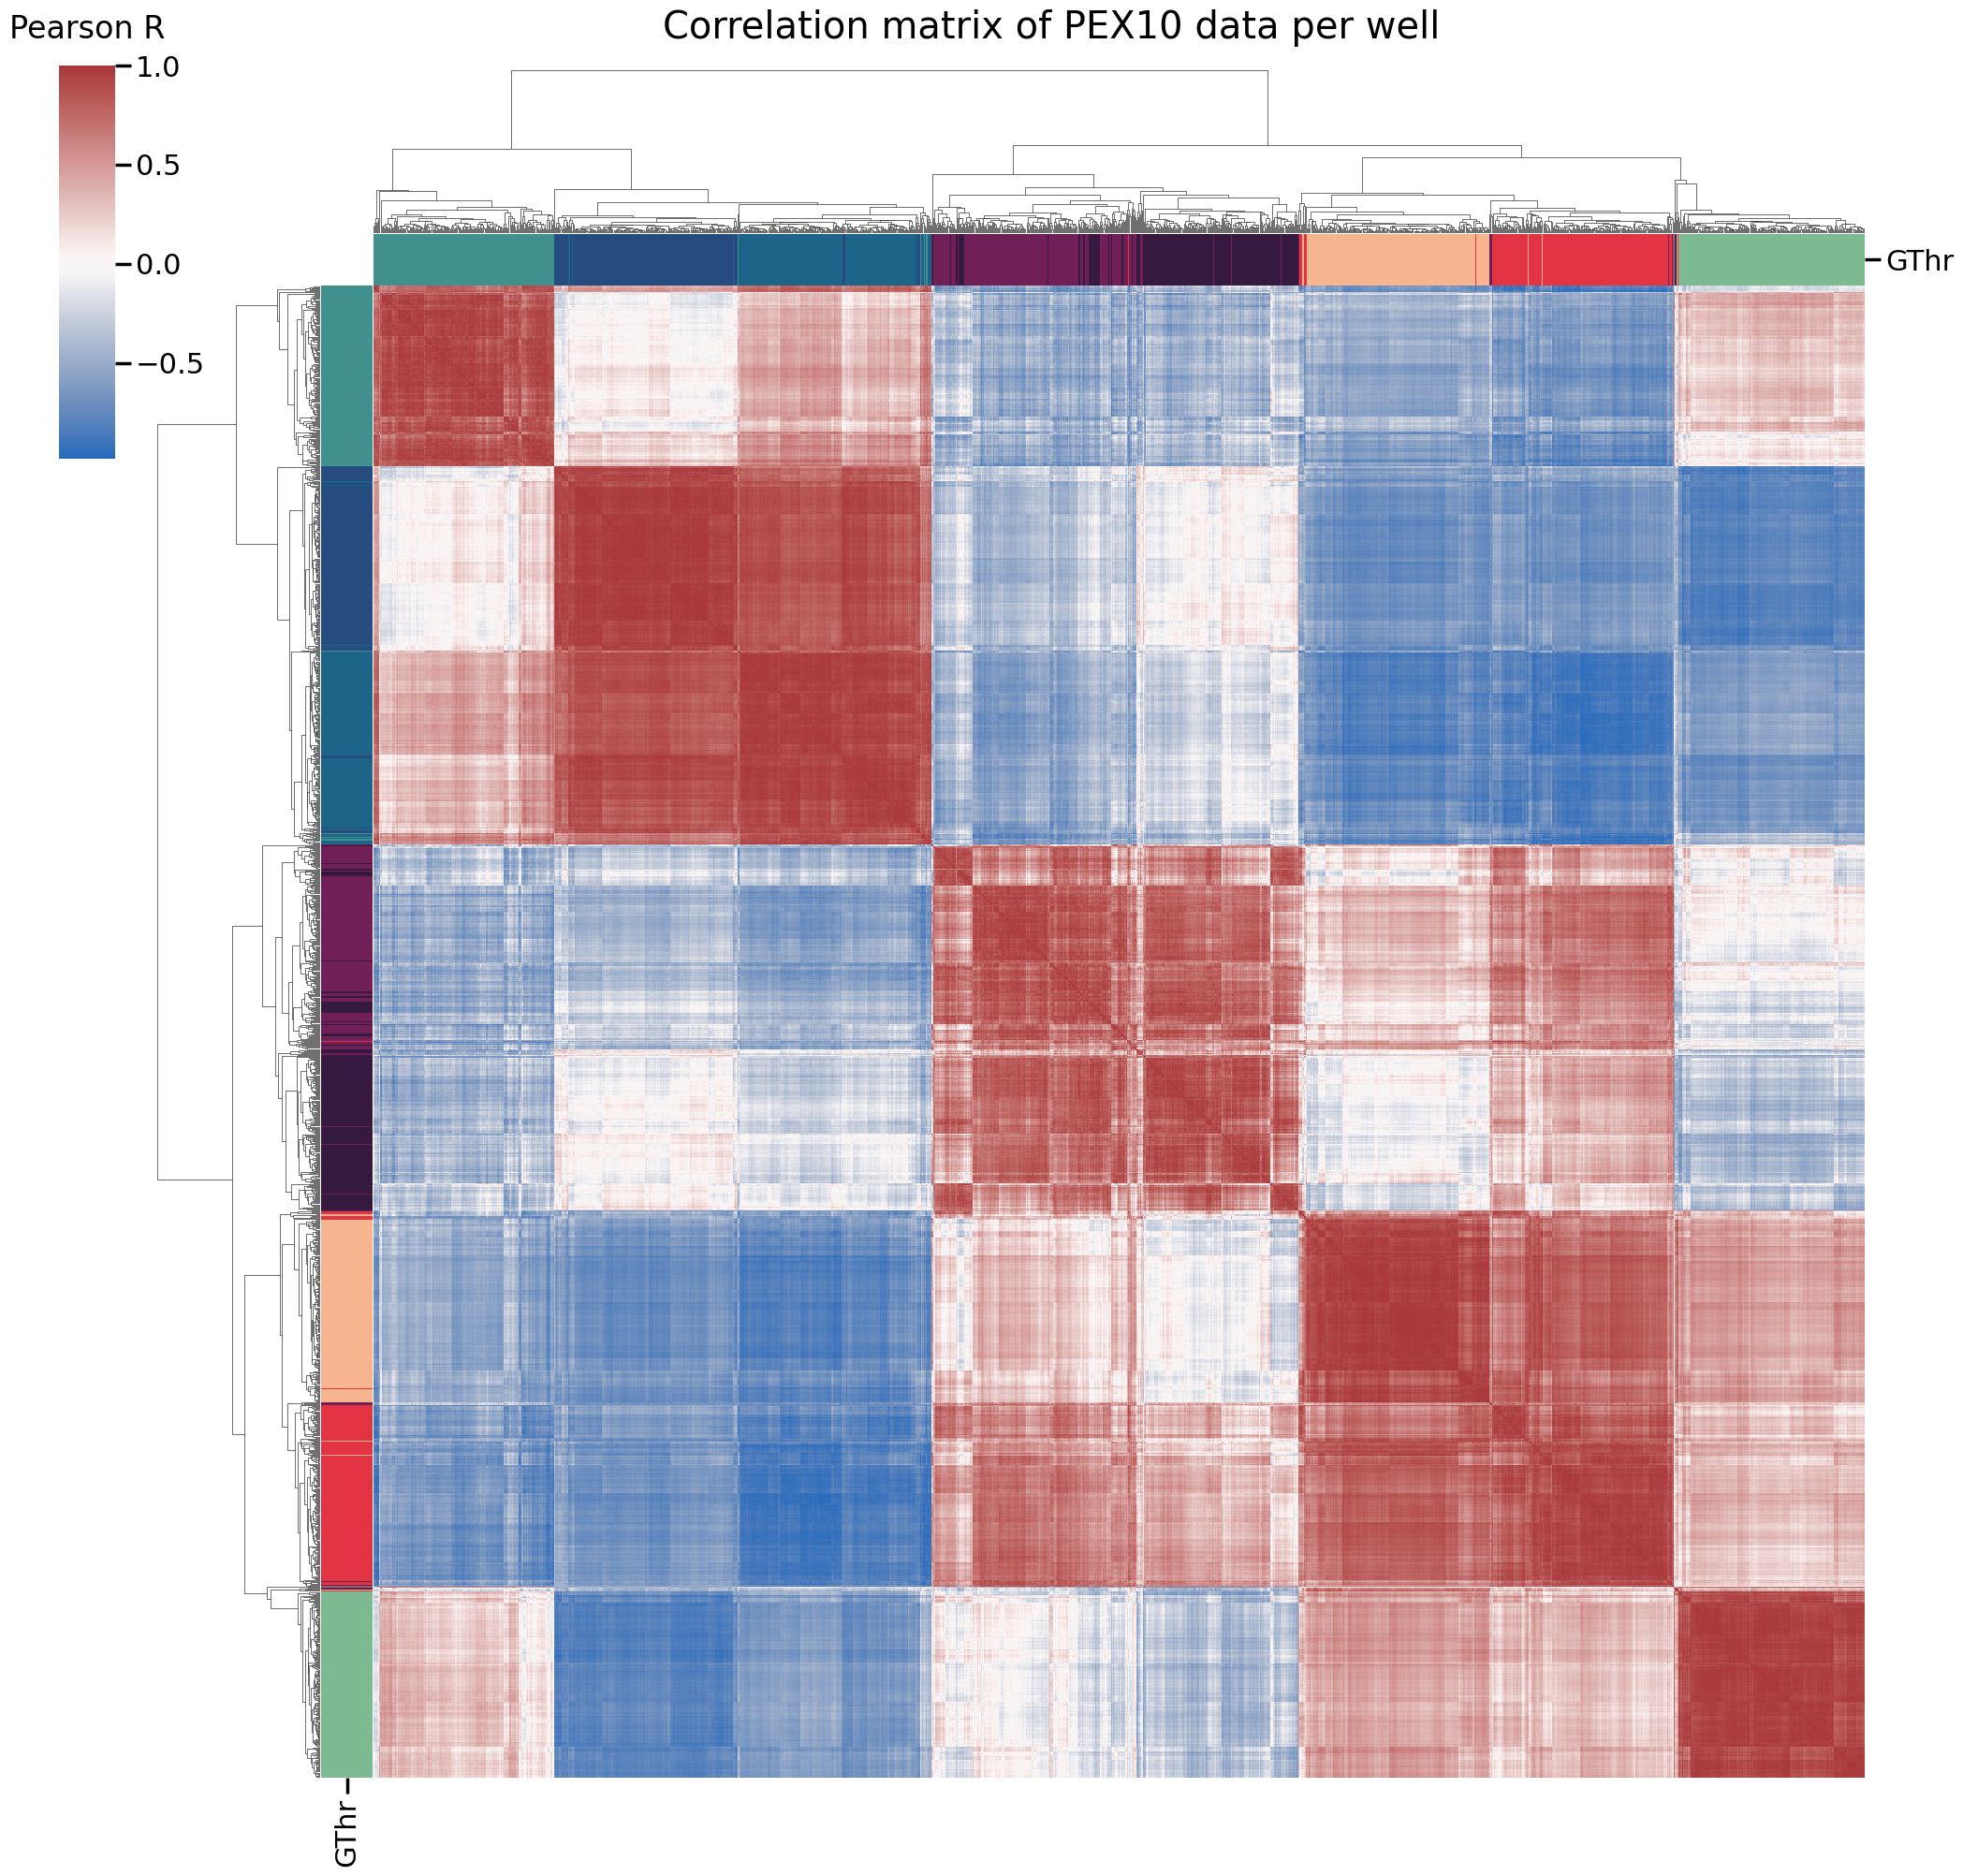

In [315]:
# Draw the heatmap with the mask and correct aspect ratio
kwargs={'xticklabels':False,
       'yticklabels':False}
sns.clustermap(corr, 
               col_colors=row_colors,
               row_colors=row_colors,
               figsize=(20,20),
            # mask=mask, 
            cmap="vlag", 
            dendrogram_ratio=(0.1, 0.1),
            # vmax=.3, center=0,
            # linewidths=.5, cbar_kws={"shrink": .5}
            cbar_pos=(-0.03, 0.77, 0.03, 0.21),
            **kwargs
           )
plt.title('Pearson R', y=1.05)
plt.suptitle('Correlation matrix of PEX10 data per well', y=1.01);

/home/apaulson/miniconda3/envs/new-pandas/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


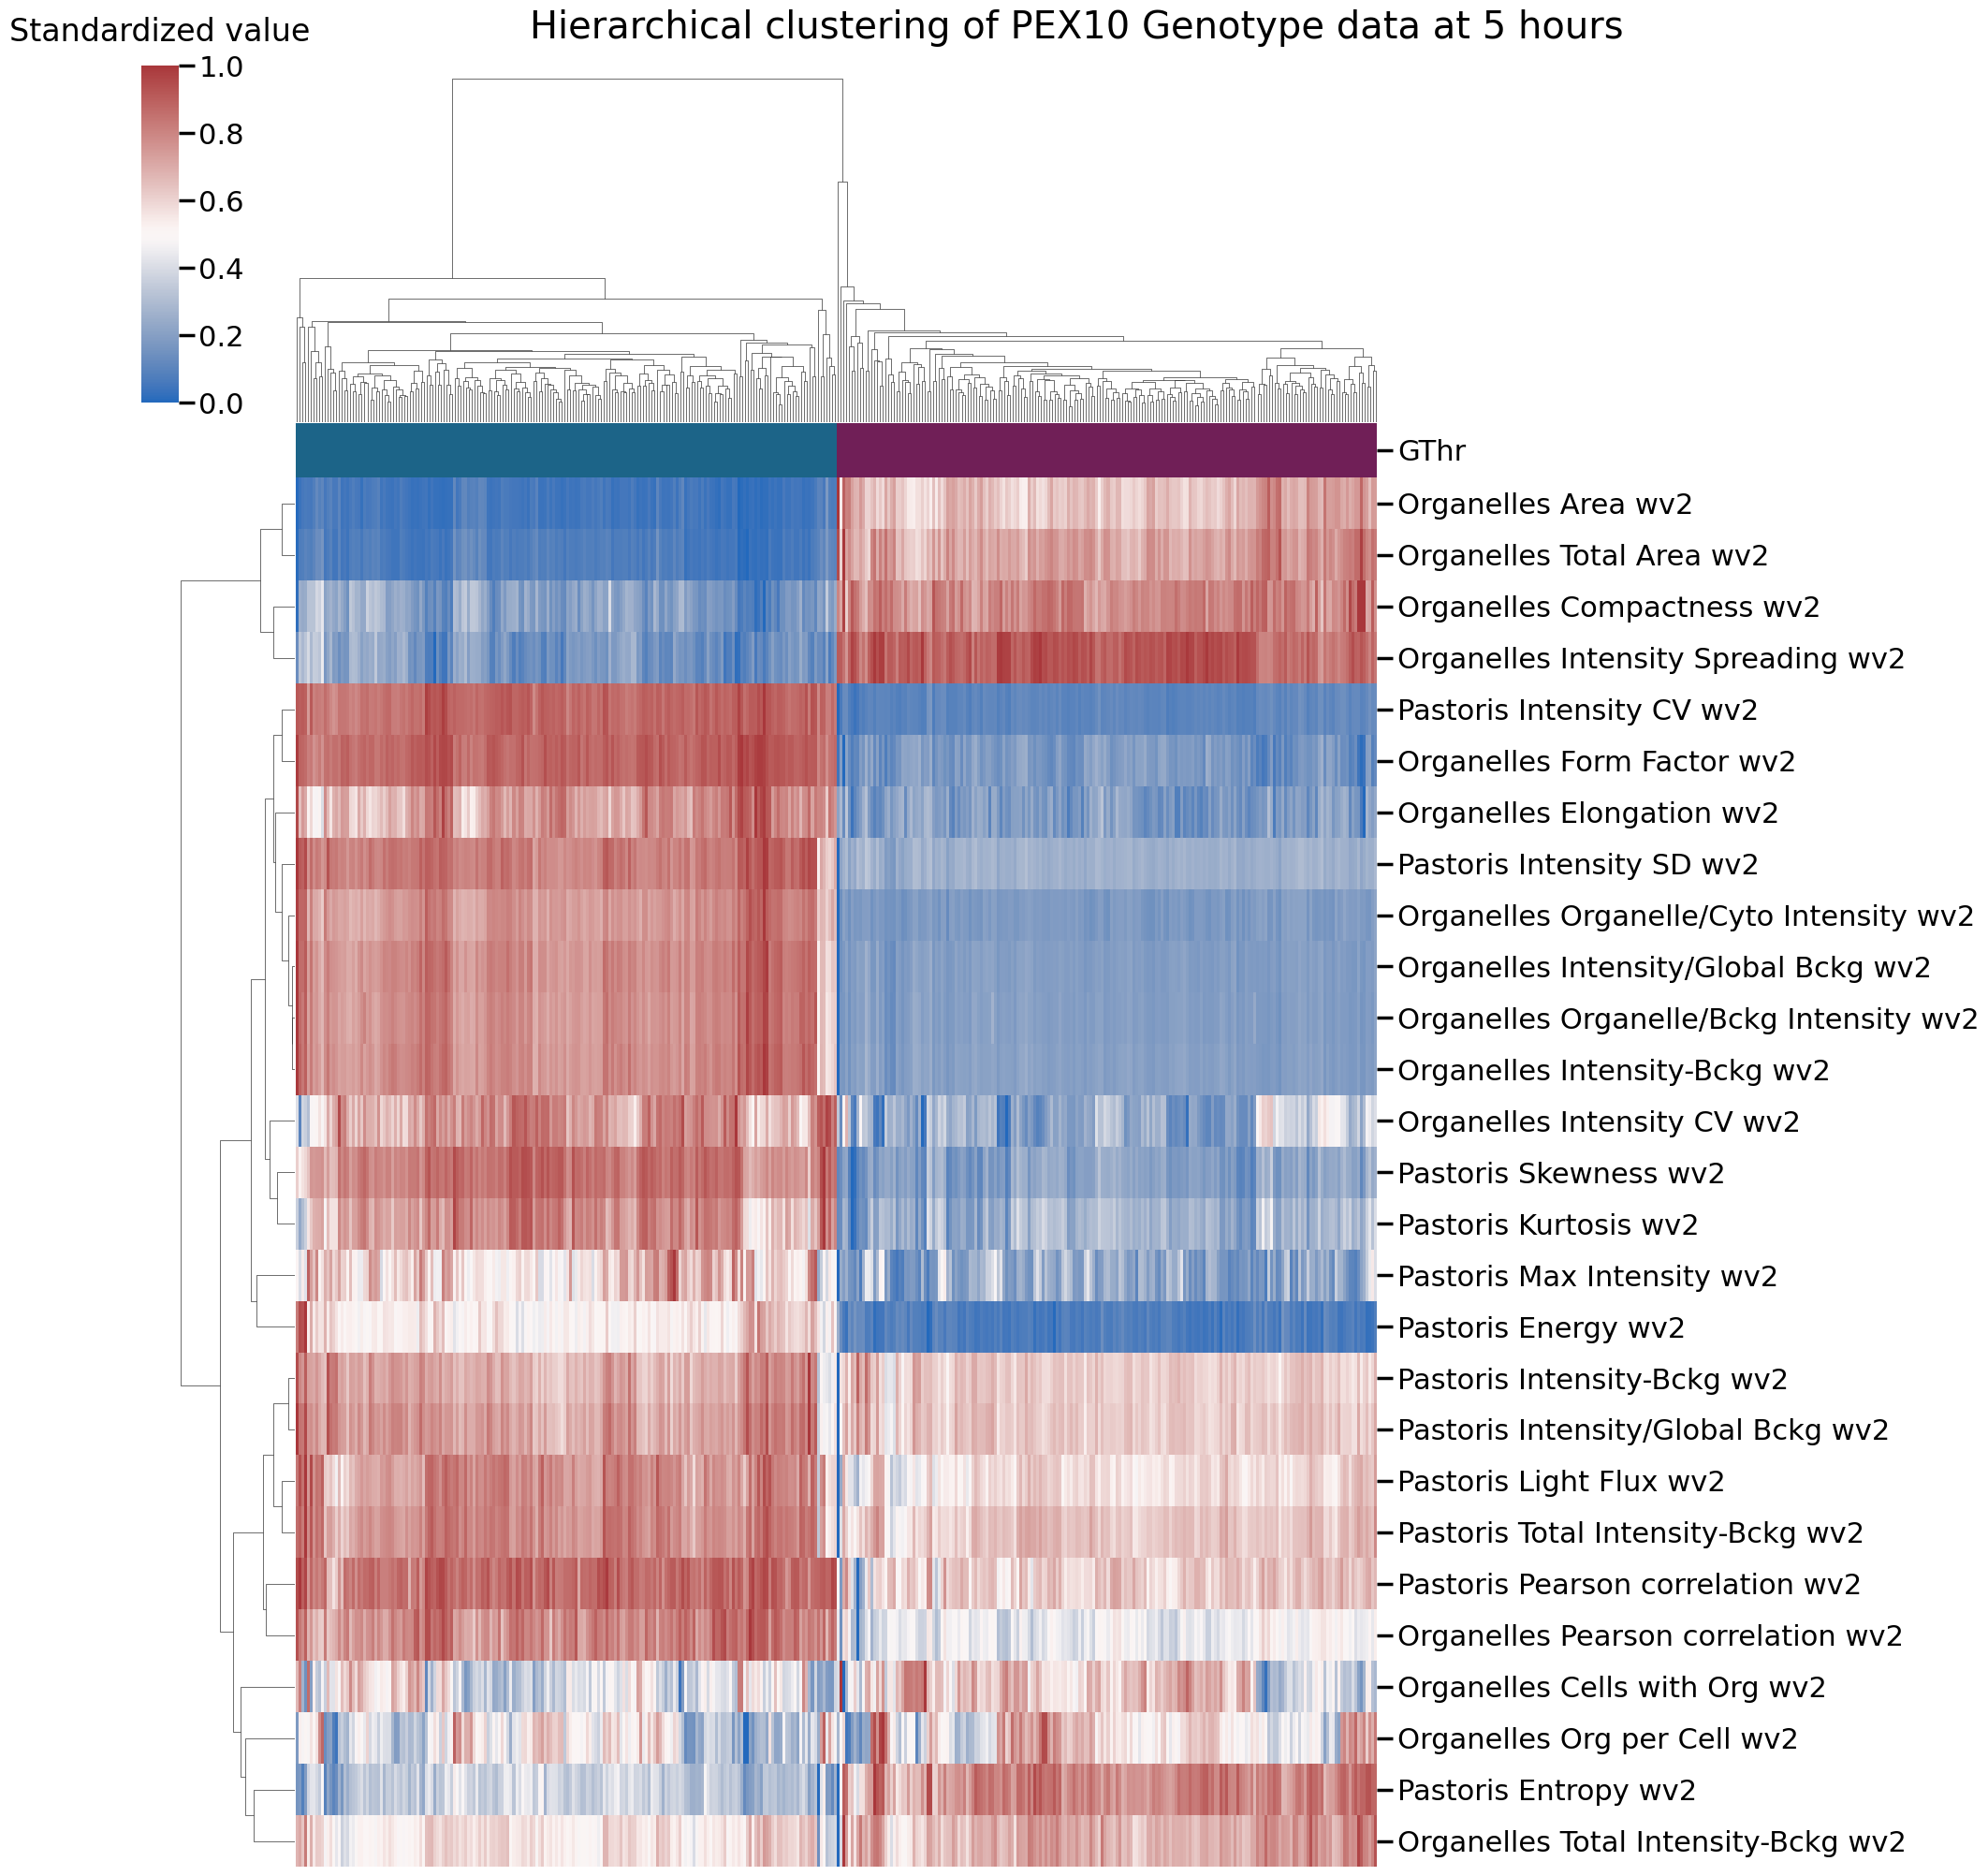

In [301]:
hr=5
lut = dict(zip(ts.GThr.unique(), pal.as_hex()))
row_colors = ts[ts.T_hr==hr].GThr.map(lut)
kwargs={'xticklabels':False}
sns.clustermap(ts[ts.T_hr==hr][wv2cols].T, 
               standard_scale=0, 
               col_colors=row_colors, 
               cmap="vlag",
               figsize=(20, 20),
               dendrogram_ratio=(0.1, 0.2),
               cbar_pos=(0.0, 0.8, 0.02, 0.18),
               **kwargs)
plt.title('Standardized value', y=1.05)
plt.suptitle(f'Hierarchical clustering of PEX10 Genotype data at {hr} hours', y=1.01);

Text(0.5, 1.02, 'Pairplot of selected PEX10 imaging features')

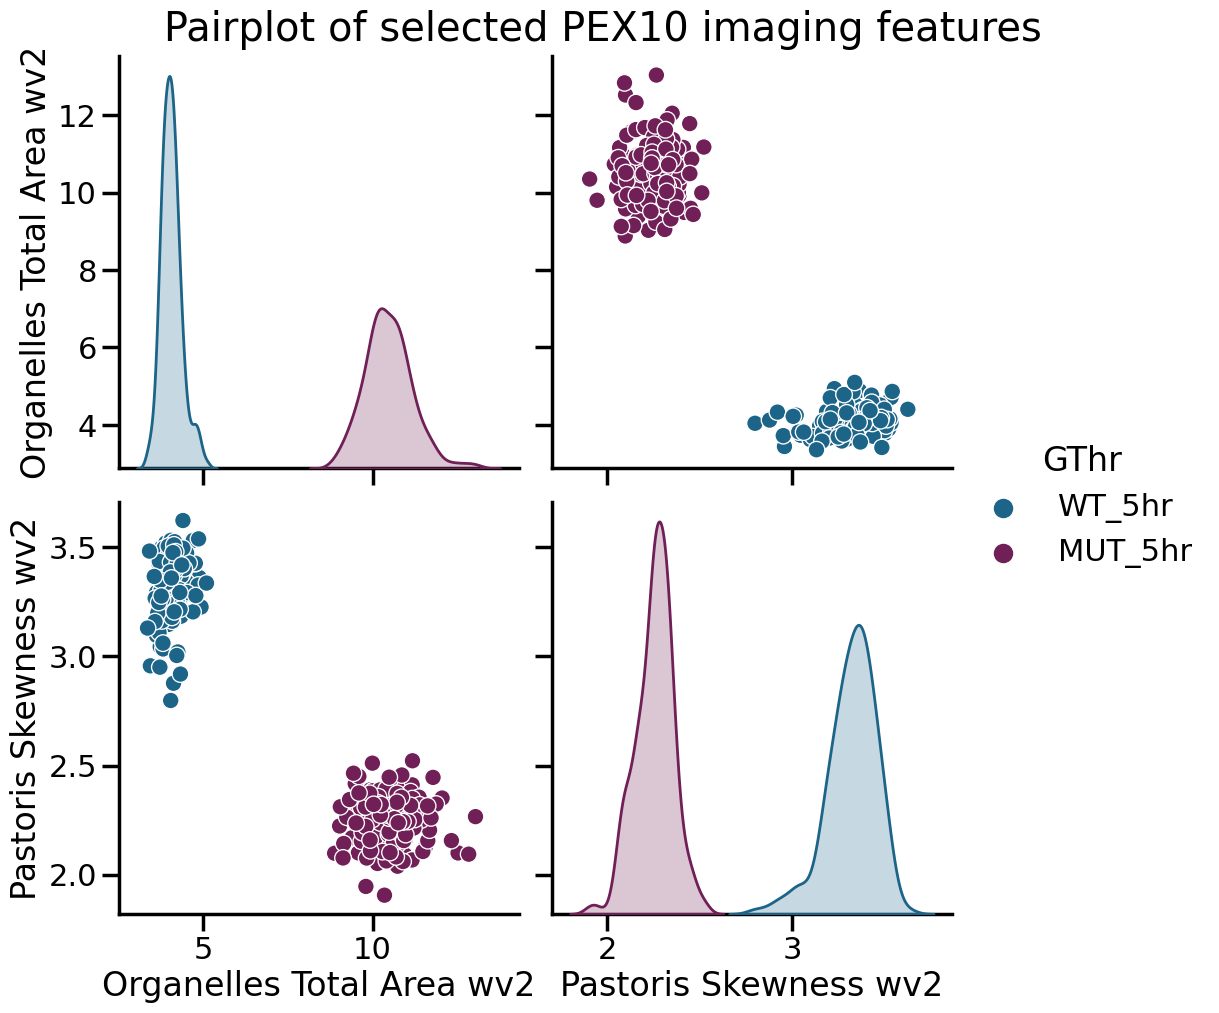

In [302]:
sns.set_context('poster')
sns.pairplot(ts.loc[ts.T_hr==hr, ['Organelles Total Area wv2','Pastoris Skewness wv2', 'GThr']], hue='GThr', height=5, aspect=1, palette=[pal[2], pal[6]])
plt.suptitle('Pairplot of selected PEX10 imaging features', y=1.02)

/home/apaulson/miniconda3/envs/new-pandas/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


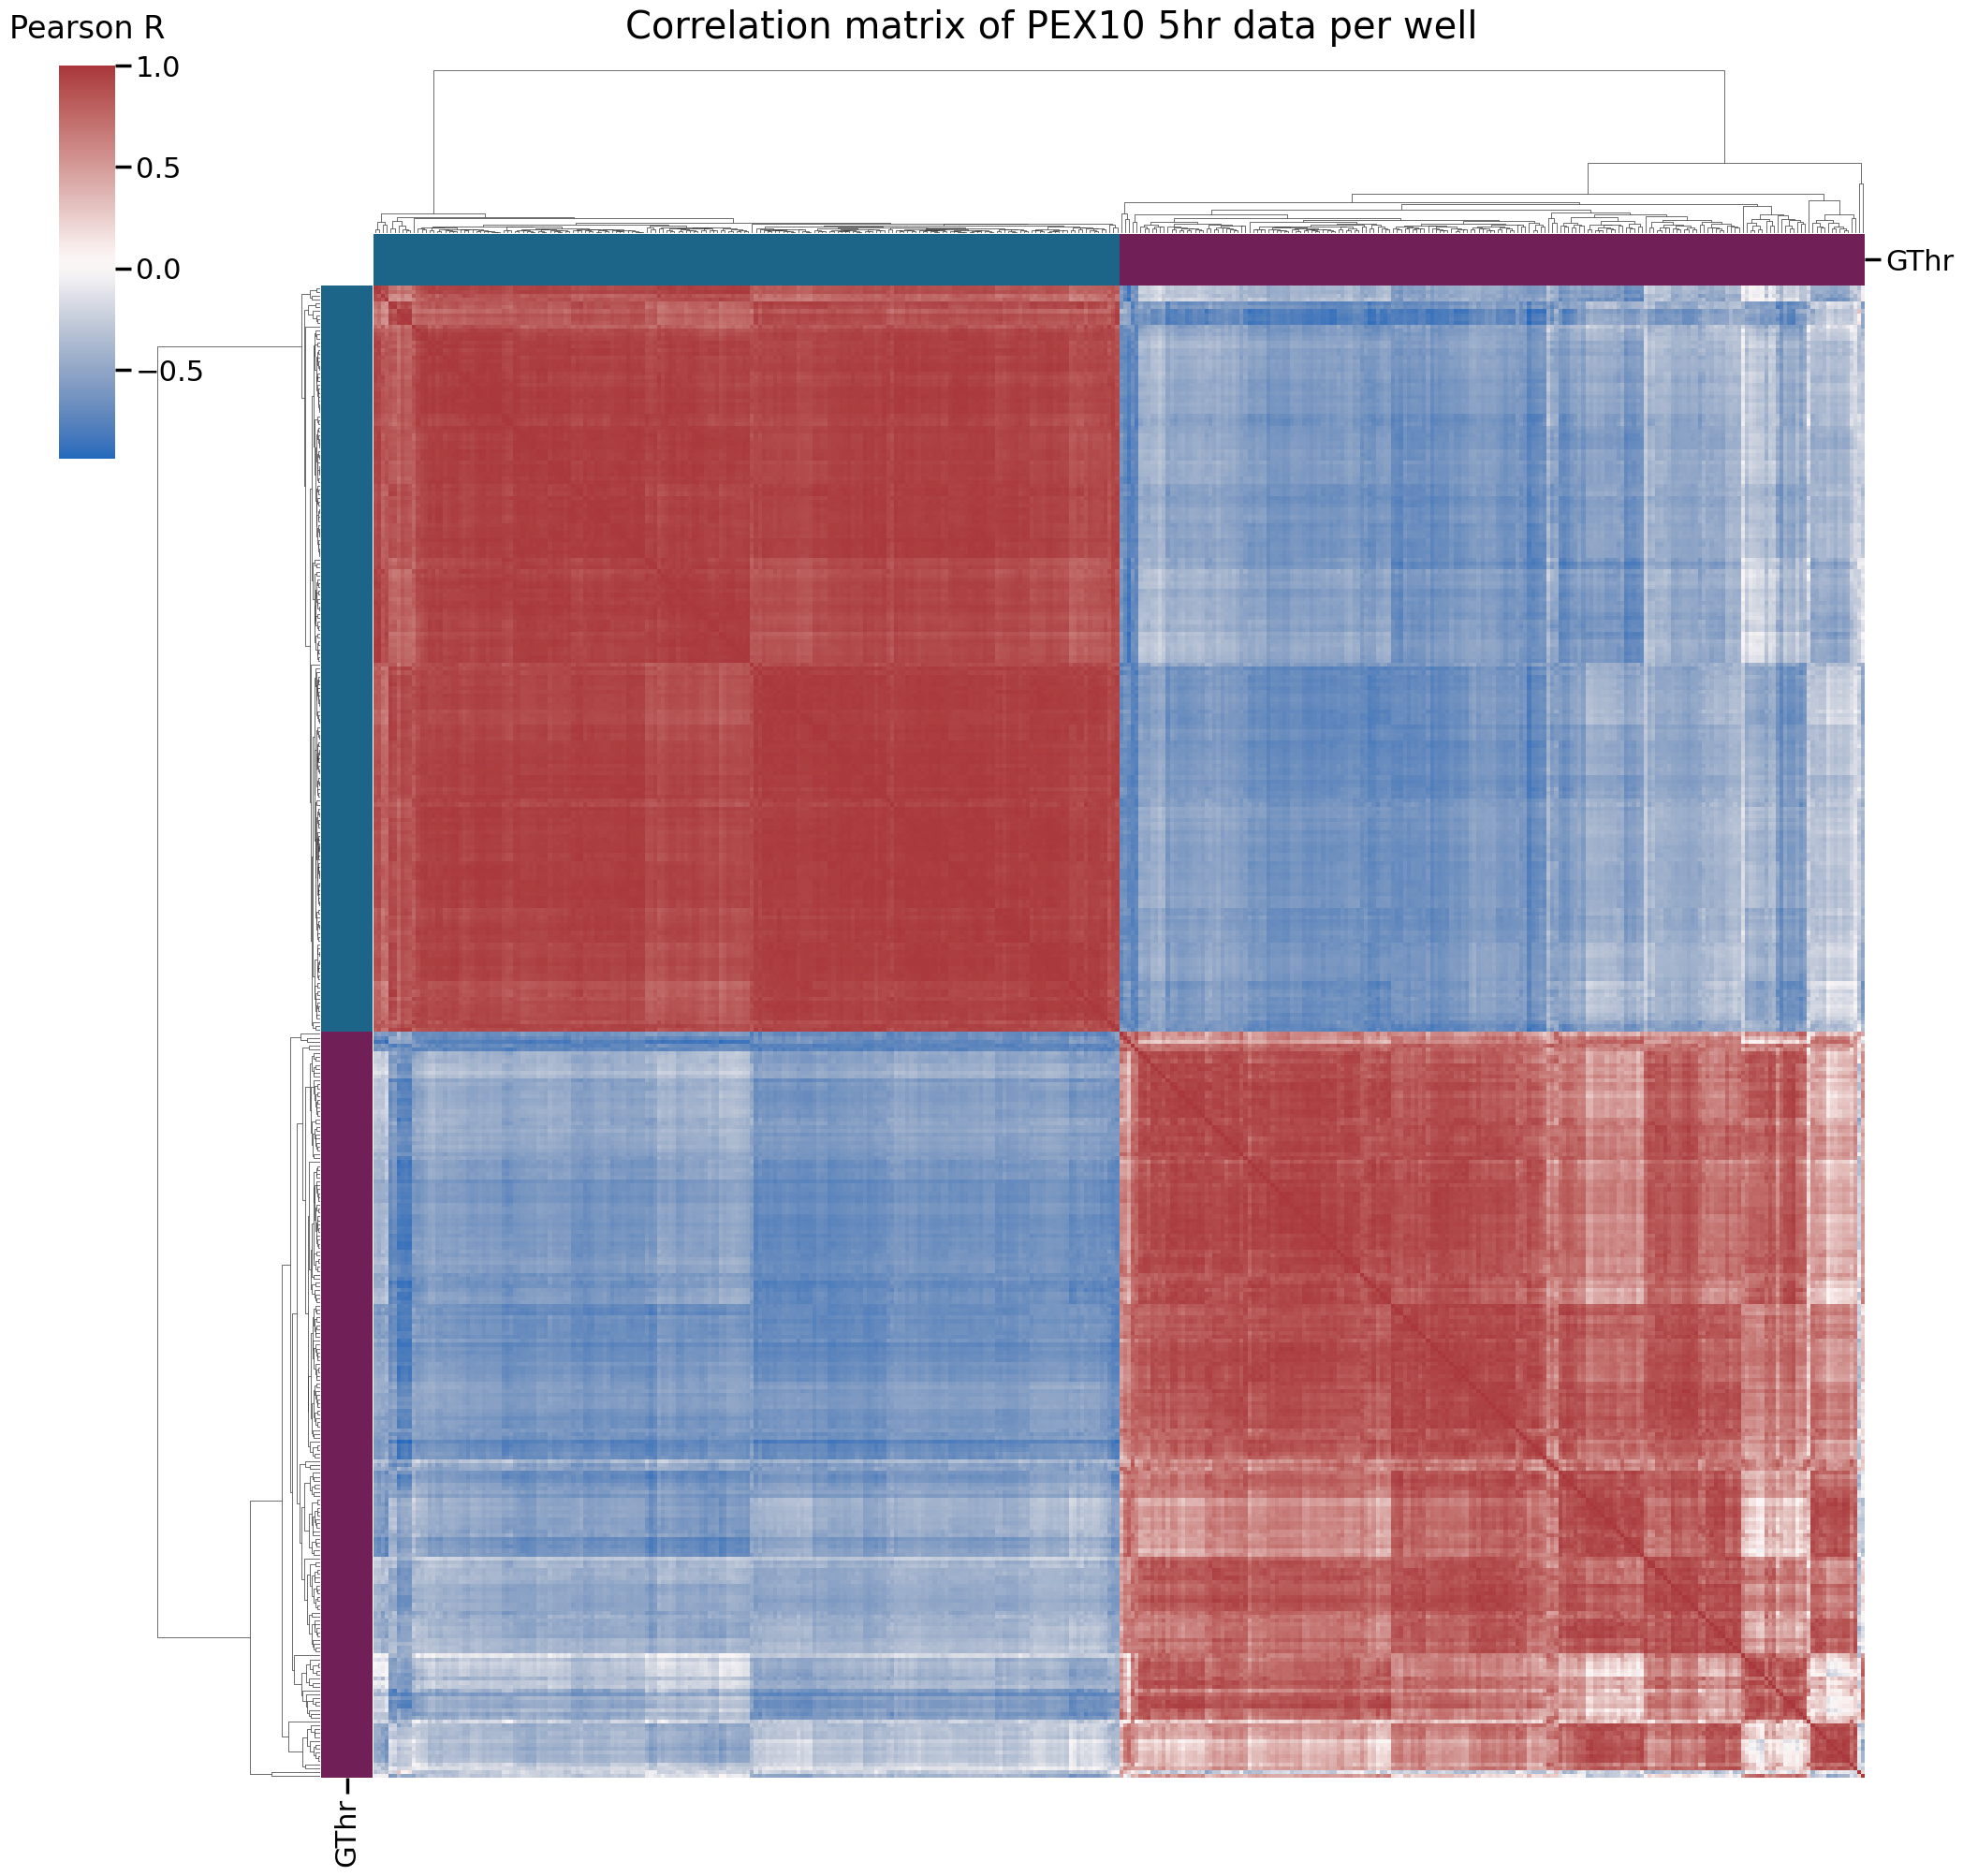

In [342]:
hr=5
sns.set_context('poster')
# Compute the correlation matrix
scaled_wv2=StandardScaler().fit_transform(ts[wv2cols])
scaled_wv2=pd.DataFrame(scaled_wv2, columns=wv2cols, index=ts.index)
scaled_wv2=scaled_wv2.join(ts[['T_hr']])

corr = scaled_wv2[scaled_wv2.T_hr==hr].drop(columns='T_hr').T.corr()

# Draw the heatmap with the mask and correct aspect ratio
kwargs={'xticklabels':False,
       'yticklabels':False}
sns.clustermap(corr, 
               col_colors=row_colors,
               row_colors=row_colors,
               figsize=(20,20),
            # mask=mask, 
            cmap="vlag", 
            dendrogram_ratio=(0.1, 0.1),
            # vmax=.3, center=0,
            # linewidths=.5, cbar_kws={"shrink": .5}
            cbar_pos=(-0.03, 0.77, 0.03, 0.21),
            **kwargs
           )
plt.title('Pearson R', y=1.05)
plt.suptitle(f'Correlation matrix of PEX10 {hr}hr data per well', y=1.01);